In [280]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.rcParams['figure.figsize'] = (20, 10)

In [264]:
validationLogFiles = [
    'FineTunedNormalResults800000/model-cnnTweaked-glove-val-log.txt',
    'FineTunedNormalResults800000/model-cnnTweaked-word2vec-val-log.txt',
    'FineTunedNormalResults800000/model-cnnTweaked-both-val-log.txt'
]

In [265]:
commonDF = pd.DataFrame()
columnNames = ['glove','word2vec','both']
i = 0
for filepath in validationLogFiles:
    commonDF = pd.concat([commonDF,pd.read_csv(filepath,header=None,index_col=0,names=[columnNames[i]])],axis=1)
    i += 1
commonDF.head()

,glove,word2vec,both
0,0.759244,0.815558,0.959067
4000,0.459995,0.459995,0.458138
8000,0.460036,0.459995,0.459269
12000,0.459511,0.459995,0.458703
16000,0.447037,0.459995,0.457573


In [266]:
commonDF.describe()

,glove,word2vec,both
count,201.000000,201.000000,201.000000
mean,0.350133,0.394687,0.460788
std,0.037209,0.039172,0.035326
min,0.331382,0.373971,0.456806
25%,0.334006,0.376837,0.457977
50%,0.339738,0.381641,0.458300
75%,0.352293,0.394558,0.458663
max,0.759244,0.815558,0.959067


Text(0,0.5,'Validation Error')

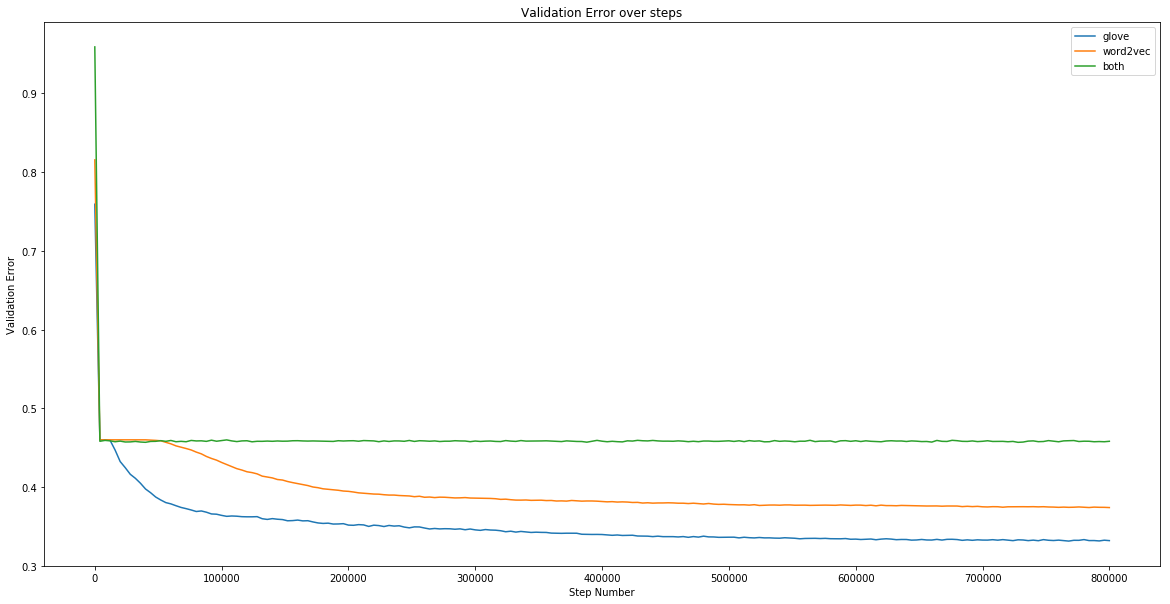

In [275]:
ax = commonDF.plot(title='Validation Error over steps')
ax.set_xlabel("Step Number")
ax.set_ylabel("Validation Error")

Do per label stats 

In [281]:
labelTruthFiles = [
    'FineTunedNormalResults800000/model-cnnTweaked-glove-validationTruths.txt',
    'FineTunedNormalResults800000/model-cnnTweaked-word2vec-validationTruths.txt',
    'FineTunedNormalResults800000/model-cnnTweaked-both-validationTruths.txt'
]

In [282]:
dataFrames = []
frameNames = ['glove','word2vec','both']
for filepath in labelTruthFiles:
    temp = pd.read_csv(filepath,header=None,names=['truth','prediction'])
    temp['same'] = (temp['truth'] == temp['prediction'])
    dataFrames.append(temp)

Label Distribution

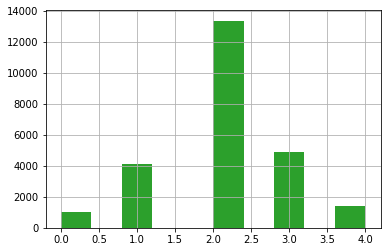

In [283]:
j = 0
for df in dataFrames:
#     print(frameNames[j])
#     print("Overall Distribution of labels:")
    df['truth'].hist()
#     plt.show()
    j += 1

Truth Value: 0
False    835
True     169
Name: same, dtype: int64


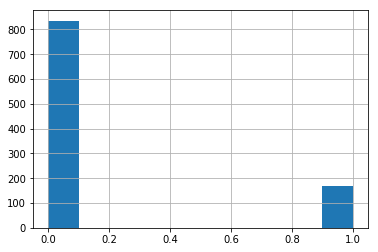

False    970
True      34
Name: same, dtype: int64


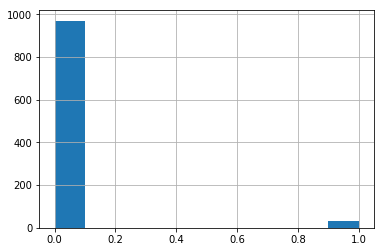

False    1004
Name: same, dtype: int64


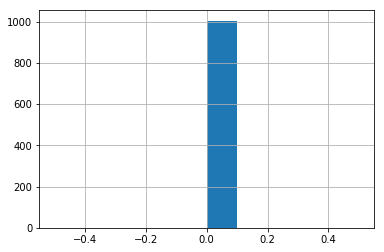

Truth Value: 1
False    2144
True     1957
Name: same, dtype: int64


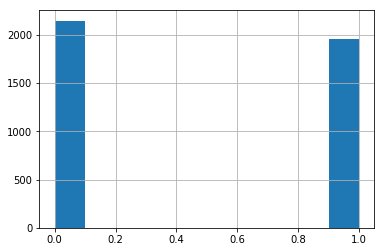

False    2590
True     1511
Name: same, dtype: int64


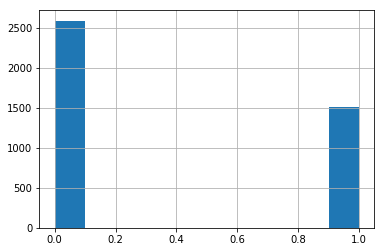

False    4101
Name: same, dtype: int64


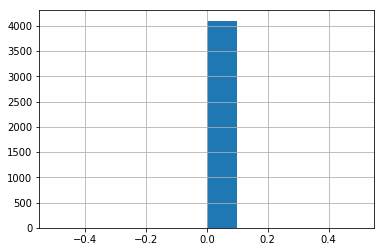

Truth Value: 2
True     11489
False     1888
Name: same, dtype: int64


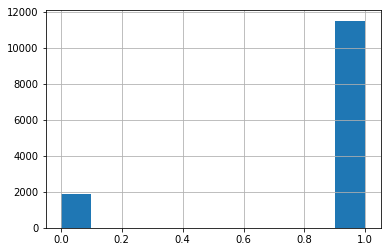

True     11705
False     1672
Name: same, dtype: int64


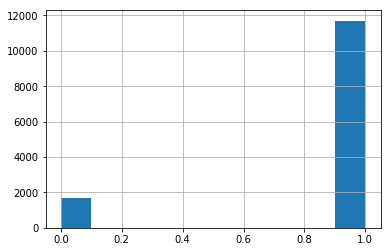

True     13239
False      138
Name: same, dtype: int64


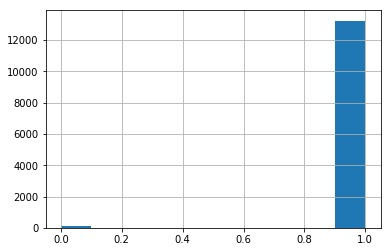

Truth Value: 3
True     2556
False    2344
Name: same, dtype: int64


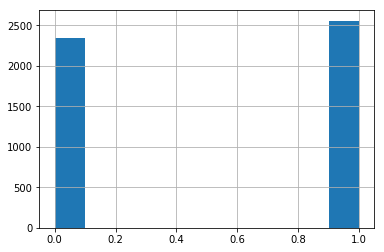

False    2795
True     2105
Name: same, dtype: int64


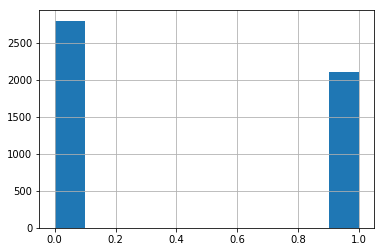

False    4716
True      184
Name: same, dtype: int64


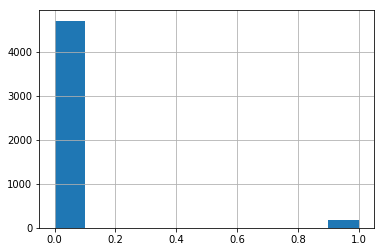

Truth Value: 4
False    1013
True      377
Name: same, dtype: int64


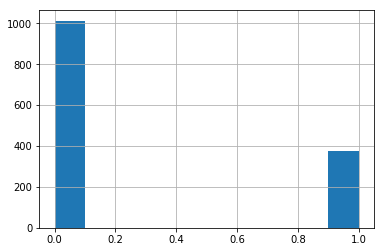

False    1237
True      153
Name: same, dtype: int64


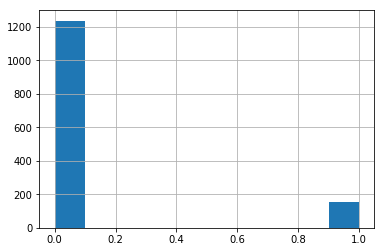

False    1390
Name: same, dtype: int64


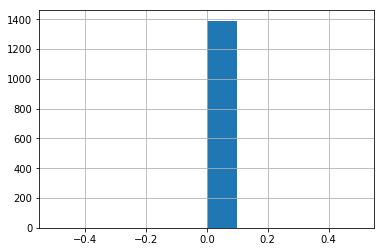

In [284]:

for truth in range(5):
    print("Truth Value: " + str(truth))
    j = 0
    for df in dataFrames:
    #     print(frameNames[j])
    #     print("Overall Distribution of labels:")
        print(df[df['truth'] == truth]['same'].value_counts())
        df[df['truth'] == truth]['same'].hist()
#         df.hist()
        j += 1
        plt.show()



Training Set Distribution to understand per label distribution

In [272]:
trainingFile = 'data/stanfordSentimentTreebank/sentiment_labels.txt'
trainingSet = pd.read_table(trainingFile,delimiter='|')

Text(0,0.5,'Count')

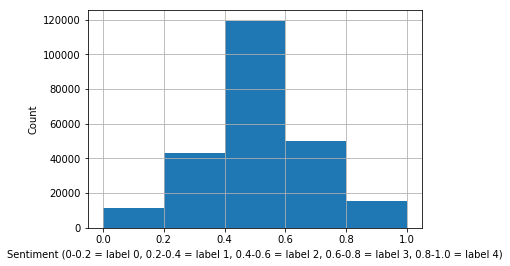

In [273]:
ax2 = trainingSet['sentiment values'].hist(bins = 5)
ax2.set_xlabel("Sentiment (0-0.2 = label 0, 0.2-0.4 = label 1, 0.4-0.6 = label 2, 0.6-0.8 = label 3, 0.8-1.0 = label 4)")
ax2.set_ylabel("Count")